Notebook with the code to calculate the fragmentation of the intermetallic particles 


In [30]:
# Load packages

# For function declarations
import IMCFunctions as fct
import importlib
importlib.reload(fct)

# For data management
import numpy as np
import pandas as pd
import xarray as xr
import h5py
import pickle

# For image analysis 
import skimage as sk
from skimage.measure import label, regionprops, find_contours,  perimeter
from skimage.draw import polygon_perimeter
from scipy.spatial.distance import cdist
import scipy
from skimage import draw
from scipy.spatial import ConvexHull
from skimage import measure, morphology

# for visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
import matplotlib.colors as mcolors

# for math
import math
import random
import re

The values of the strain at each rolling step are obtained from FEM simulations. 
There is a function for getting the strain values from both the center or the edge. 
Alternatively, a list containing the required strain values could be used if there is not a set of files to extract the values from


In [ ]:

# Example list of files 
file_list = [
    "Rolling_Simulations/E23849_N-15.xlsx",
    "Rolling_Simulations/E23849_N-14.xlsx",
    "Rolling_Simulations/E23849_N-13.xlsx",
    "Rolling_Simulations/E23849_N-12.xlsx",
    "Rolling_Simulations/E23849_N-11.xlsx",
    "Rolling_Simulations/E23849_N-10.xlsx",
    "Rolling_Simulations/E23849_N-9.xlsx",
    "Rolling_Simulations/E23849_N-8.xlsx",
    "Rolling_Simulations/E23849_N-7.xlsx",
    "Rolling_Simulations/E23849_N-6.xlsx",
    "Rolling_Simulations/E23849_N-5.xlsx",
    "Rolling_Simulations/E23849_N-4.xlsx",
    "Rolling_Simulations/E23849_N-3.xlsx",
    "Rolling_Simulations/E23849_N-2.xlsx",
    "Rolling_Simulations/E23849_N-1.xlsx",
    "Rolling_Simulations/E23849_N.xlsx"
]


# list_strains = fct.get_strain_list_center(file_list) # function to get the strain values at the center
list_strains = [0.05809204300020777, 0.060782565178068015, 0.061220222167086225, 0.12715897982461857, 0.14194752781596645, 0.1604265649963897, 0.10137152117593758, 0.202488223656142, 0.2449337499911786, 0.3104171210379421, 0.42842262985352225, 0.4387137488155371, 0.48637974864405925, 0.18319346397307065, 1.0475332159601232, 0.8461593194379728]
# list_strains_edge = fct. get_strain_list_edge(file_list) # function to get the strain values at the edge
list_strains_edge = [0.09893431718588981, 0.09409225517160455, 0.09424008430167026, 0.14692231240850223, 0.1579990239846345, 0.1734260332623826, 0.11230484372715538, 0.20231028190709752, 0.24434930739297792, 0.3113929155034575, 0.43680365954831457, 0.45619349804097603, 0.5080152873886402, 0.18315401612854465, 1.1030218796144808, 0.8932650021765967]

print(list_strains)
print(list_strains_edge)

[0.05809204300020777, 0.060782565178068015, 0.061220222167086225, 0.12715897982461857, 0.14194752781596645, 0.1604265649963897, 0.10137152117593758, 0.202488223656142, 0.2449337499911786, 0.3104171210379421, 0.42842262985352225, 0.4387137488155371, 0.48637974864405925, 0.18319346397307065, 1.0475332159601232, 0.8461593194379728]
[0.09893431718588981, 0.09409225517160455, 0.09424008430167026, 0.14692231240850223, 0.1579990239846345, 0.1734260332623826, 0.11230484372715538, 0.20231028190709752, 0.24434930739297792, 0.3113929155034575, 0.43680365954831457, 0.45619349804097603, 0.5080152873886402, 0.18315401612854465, 1.1030218796144808, 0.8932650021765967]


Import the segmented image, identify the particles and get their properties. 
Measure the area of the image

In [ ]:
file_name = "Segmented_Images/AH-AA6014-RC_Segmentation.h5" 

# Import segmentation
segmentation= fct.import_segmentation_data_h5(file_name)

area = fct.get_area(segmentation, 21)

input, labeled_image = fct.identify_particle_properties(segmentation, 22)




lables 672


Optionally save the particle properties to a pickle file to easily read them into the code or save them to a csv file to view them in a spreadsheet

In [ ]:
fct.save_to_pickle(input, "example_pickle")
fct.save_properties_csv(input, "example_csv")

Run the model with the previously imported data. The `multirun_full_code_probabreak`function runs the code 10 times with the same input to average out any effects of the randomness in the model. 

In [28]:
output_multirun_data, output_multirun_probas_ = fct.multirun_full_code_probabreak(input, 16, 2, 0.1, list_strains,10, weibull_modulus=0.556, reference_ecd=6.9608, reference_stress=17.6373, return_intermediate=True)

data shape start of step 0 (310, 19)
number of runs through probability break 0
data shape start of step 1 (340, 6)
number of runs through probability break 1
data shape start of step 2 (364, 6)
number of runs through probability break 2
data shape start of step 3 (384, 6)
number of runs through probability break 3
data shape start of step 4 (408, 6)
number of runs through probability break 4
data shape start of step 5 (429, 6)
number of runs through probability break 5
data shape start of step 6 (452, 6)
number of runs through probability break 6
data shape start of step 7 (468, 6)
number of runs through probability break 7
data shape start of step 8 (482, 6)
number of runs through probability break 8
data shape start of step 9 (511, 6)
number of runs through probability break 9
data shape start of step 10 (532, 6)
number of runs through probability break 10
data shape start of step 11 (558, 6)
number of runs through probability break 11
data shape start of step 12 (579, 6)
number of 

The files containing the particle properties at the center of the AA6014-RC sample at the 15th and 16th rolling step are imported to be displayed with the simulation results

In [25]:
exp_data_step15 = fct.read_from_pickle("combined_properties_18_5_center_redo")
exp_data_step16 = fct.read_from_pickle("combined_properties_9_5_center_redo")

exp_area_step15 =  797777.3049974095
exp_area_step16 =  800789.5270144404

Xarray object loaded from pickles/combined_properties_18_5_center_redo
Xarray object loaded from pickles/combined_properties_9_5_center_redo


Plot the results relative to the experimental results for the last rolling step

Simulated data (property: orientation_deg):
  Average: 10.6621
  Standard Deviation: 5.4912
  Total Number Density: 0


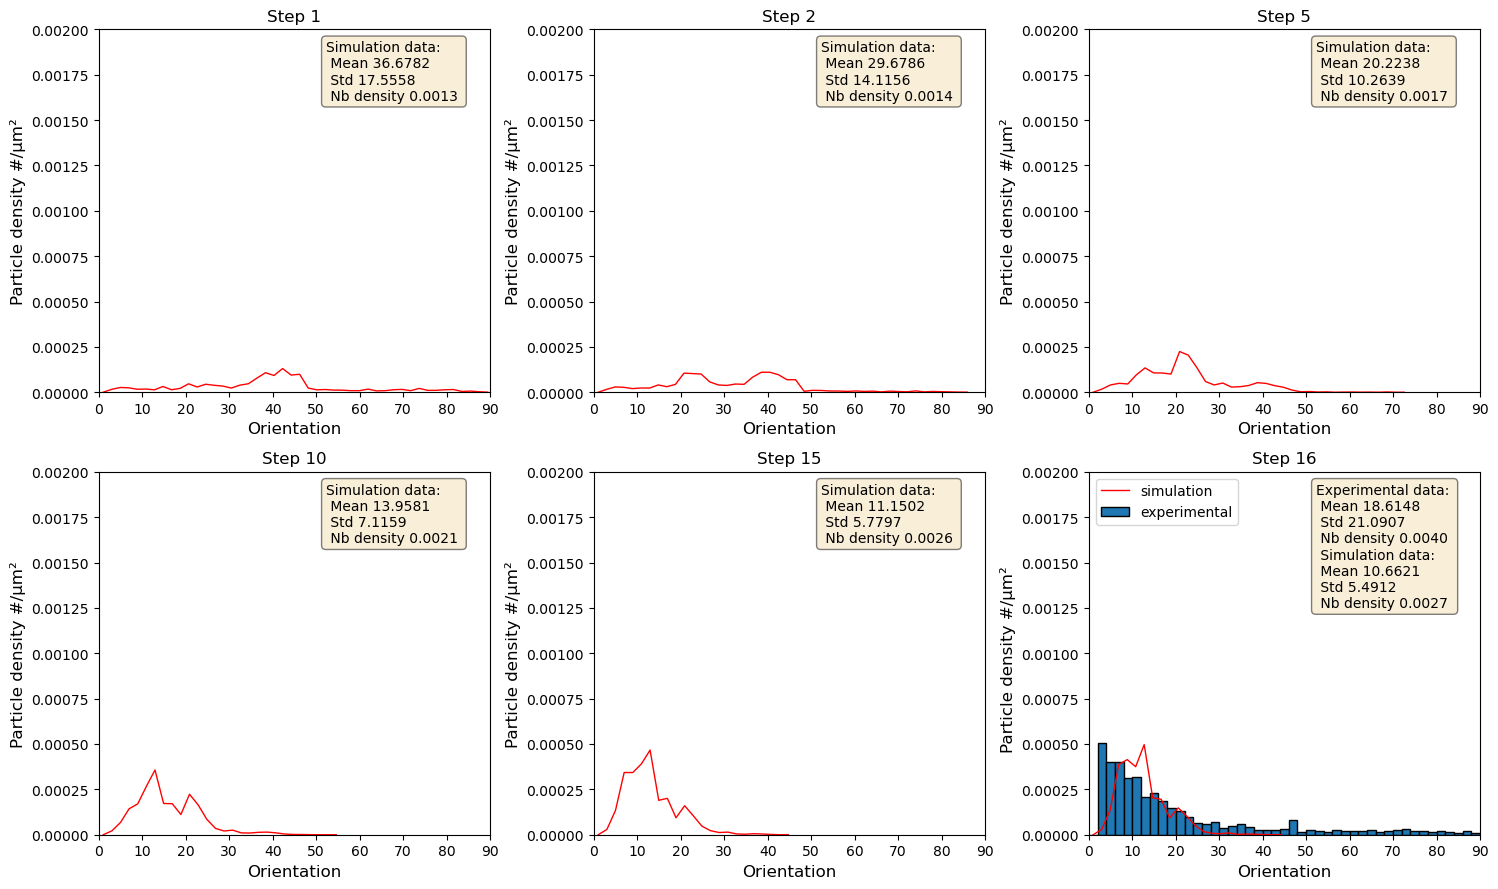

Simulated data (property: ECD):
  Average: 1.0292
  Standard Deviation: 0.7838
  Total Number Density: 0


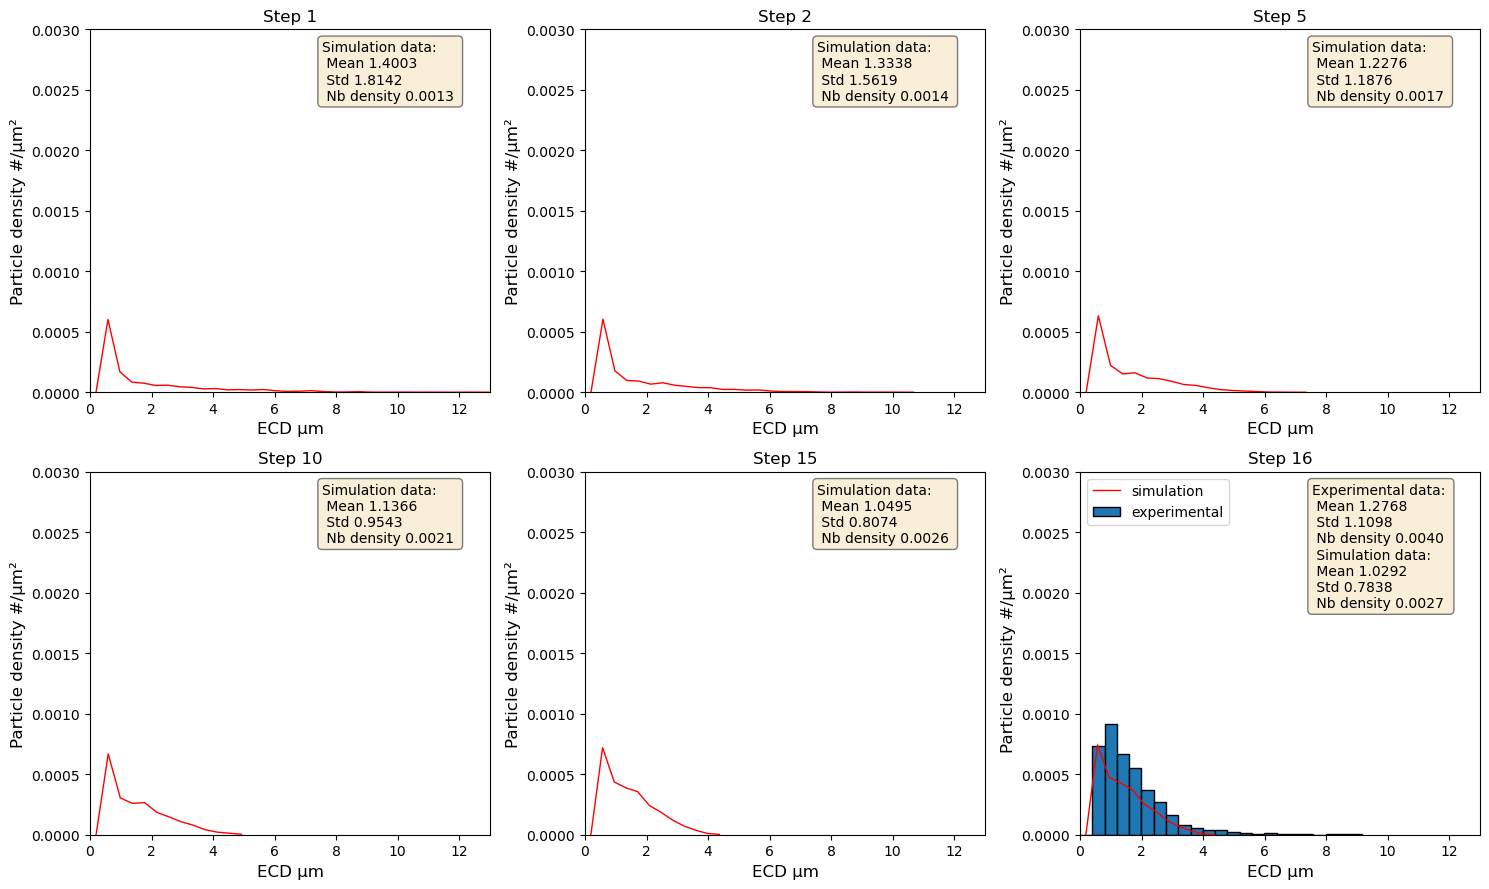

Simulated data (property: smallest_dim_area):
  Average: 1.0194
  Standard Deviation: 1.0093
  Total Number Density: 0


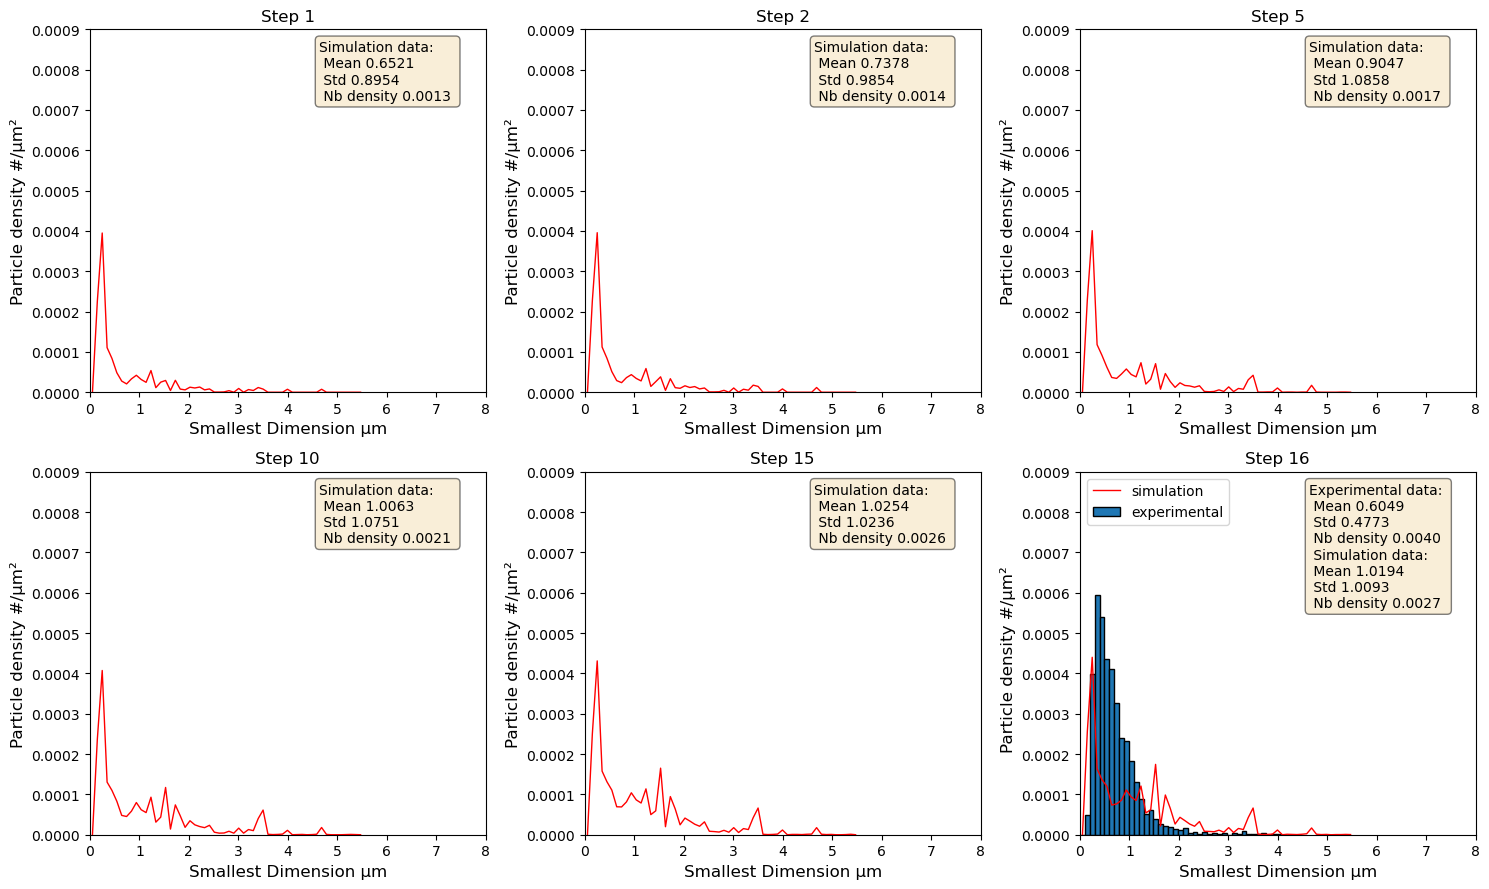

Simulated data (property: largest_dimension):
  Average: 3.2840
  Standard Deviation: 3.3659
  Total Number Density: 0


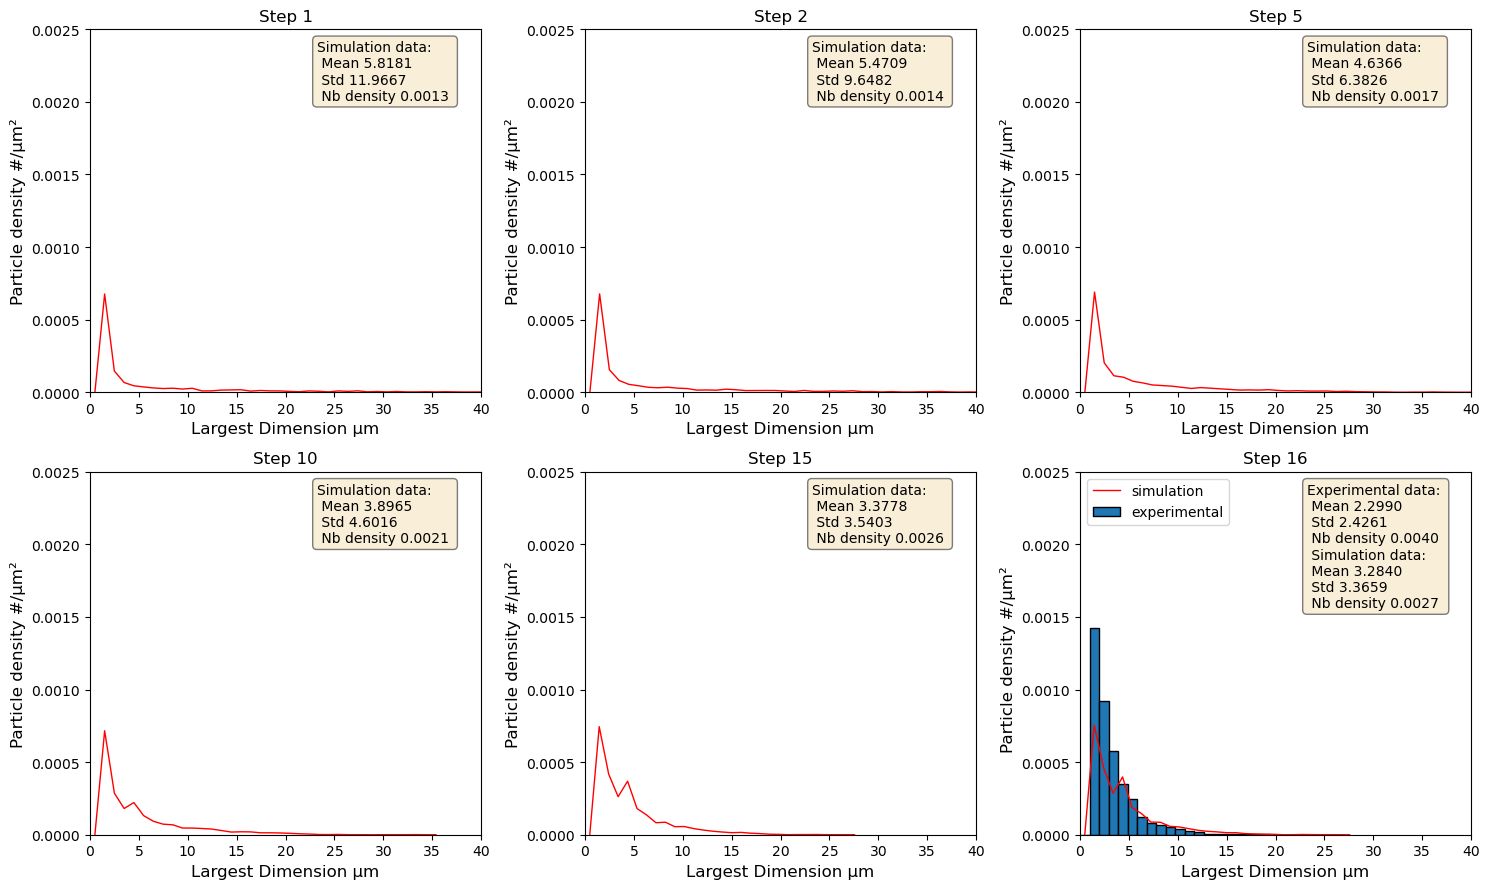

Simulated data (property: area):
  Average: 4.9080
  Standard Deviation: 7.0278
  Total Number Density: 0


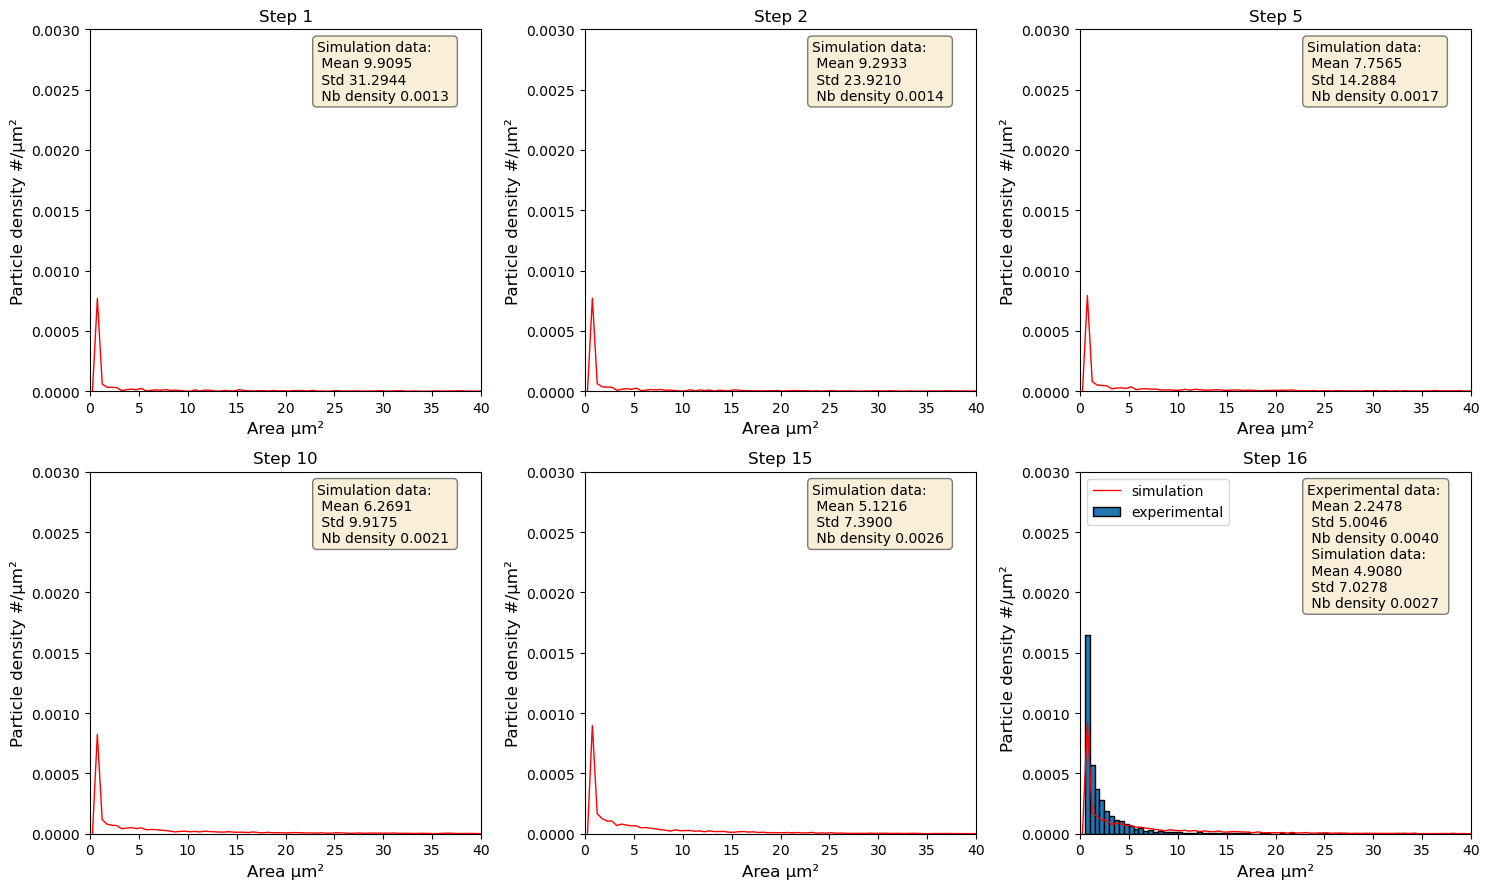

Simulated data (property: Aspect Ratio):
  Average: 4.3686
  Standard Deviation: 5.5653
  Total Number Density: 0


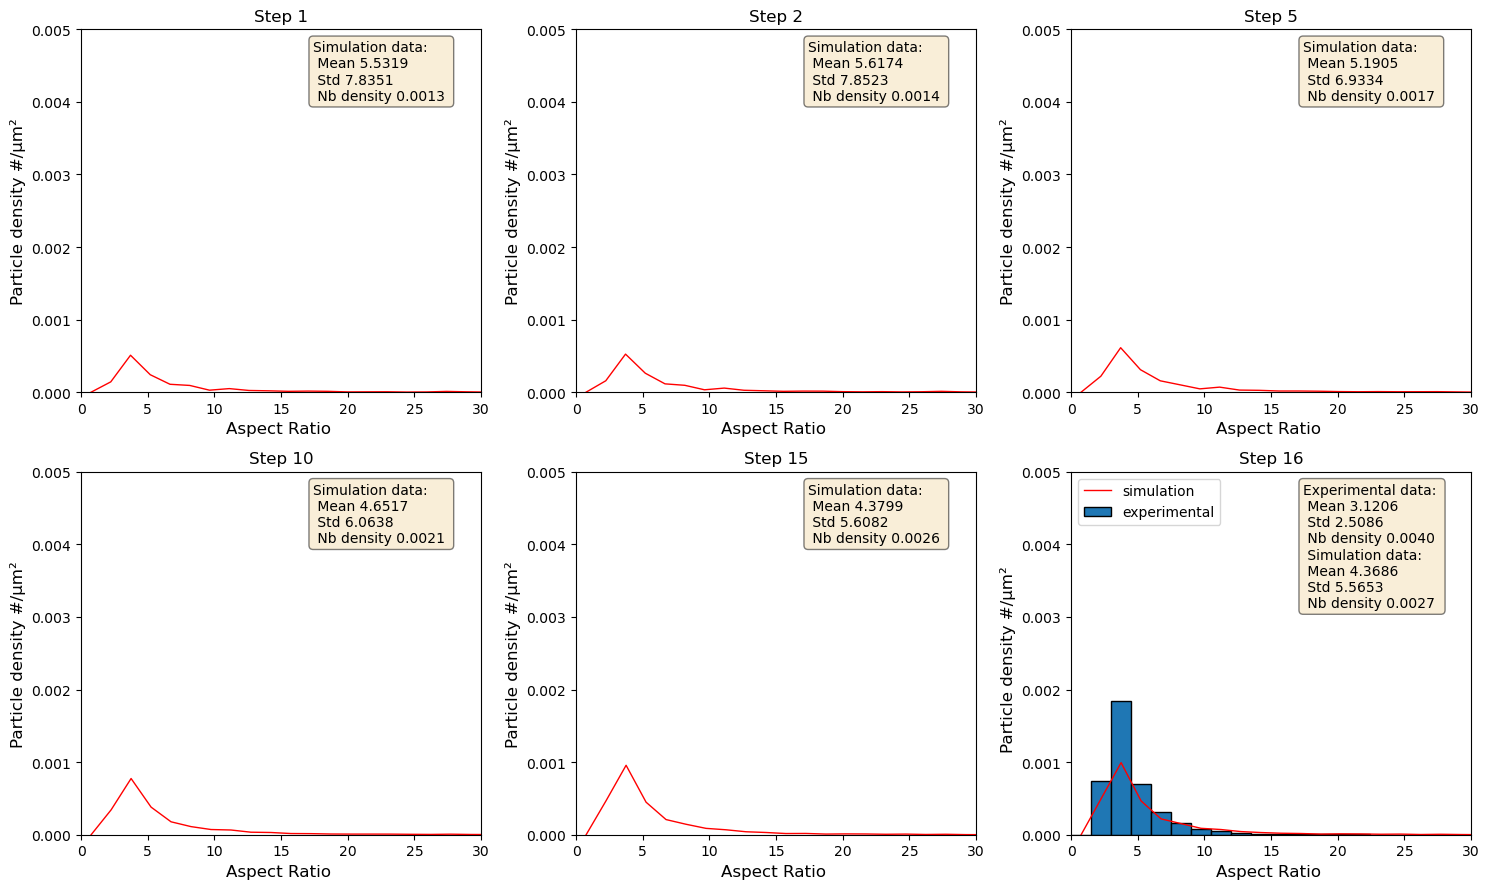

In [31]:
sim_area = area * 10 # muliply the area by 10 as the results are for 10 runs of the model

fct.multiplot_exp15(output_multirun_data, sim_area, exp_data_step16, exp_area_step16, "orientation_deg", "Orientation", "Orientation averaged over 10 runs center")

fct.multiplot_exp15(output_multirun_data, sim_area, exp_data_step16, exp_area_step16, "ECD", "ECD μm", "ECD averaged over 10 runs center")

fct.multiplot_exp15(output_multirun_data, sim_area, exp_data_step16, exp_area_step16, "smallest_dim_area", "Smallest Dimension μm", "Smallest Dimension averaged over 10 runs center")

fct.multiplot_exp15(output_multirun_data, sim_area, exp_data_step16, exp_area_step16, "largest_dimension", "Largest Dimension μm", "Largest Dimension averaged over 10 runs center")

fct.multiplot_exp15(output_multirun_data, sim_area, exp_data_step16, exp_area_step16, "area", "Area μm²", "Area averaged over 10 runs center")

fct.multiplot_exp15(output_multirun_data, sim_area, exp_data_step16, exp_area_step16, "Aspect Ratio", "Aspect Ratio ", "Aspect Ratio averaged over 10 runs center")

The particle properties at the end can be saved to a csv file

In [ ]:
fct.save_properties_csv(output_multirun_data[-1], "example_csv_output") # rolling step specified in the brackets, -1= last step